# Confidence Intervals and Hypothesis testing

In [2]:
##imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Confidence Intervals and Hypothesis testing** <br>
        In this section we'll be looking over a few interesting changes in specific searches regarding entertainment and content consumed during the COVID-19 social distancing period. <br>
        In the entertainment side, the currently most popular videogame consoles (Playstation 4, Xbox One and Nintendo Switch) were chosen to give an insight into the rising of gaming in general. As for content, we have Netflix and Amazon Prime Video representing content more related to leisure time, while Coursera and Skillshare make up for a big part of educational content on the internet. <br>
        We will be analyzing changes in interest over time using Google Trends. With this tool, we can easily compare the amount of searches for each topic before and during the COVID-19 social distancing period. Once we have these differences, we can use Confidence Intervals (CI for short) to determine wether or not the changes observed can be explained by pure luck (also called the 'Null Hypothesis') or if there were other factors involved. <br> <br>
        **Hypotheses** <br>
        We'll start by defining a few hypotheses and later confirming or denying them based on the results observed. <br>
        Among the consoles, the Nintendo Switch will be the one with the clearest difference between before and during isolation. While we can't pinpoint the cause using Data Science, we can speculate about it; One theory is that with more kids being home, parents need more activities to do with them. Given the 'fame' Nintendo has of being a family-friendly game company, parents might look into buying their console over others so that both adults and kids can take part in the games. <br>
        Netflix and Prime Video will both see a great rise in search volume in the first weeks, but as time passes the numbers will decrease substantially. <br>
         Out of all the examples mentioned, the ones with the biggest "peak" in searches are going to be the educational ones, Coursera and Skillshare. People might initially turn to them but will quickly lose interest due to the increased discipline required to maintain an online-class routine.
        

In [4]:
##importing datasets
ps4 = pd.read_csv('data/ps4.csv', sep=',')
xbox = pd.read_csv('data/x1.csv')
switch = pd.read_csv('data/switch.csv')
netflix = pd.read_csv('data/netflix.csv')
prime = pd.read_csv('data/prime.csv')
coursera = pd.read_csv('data/coursera.csv')
skillshare = pd.read_csv('data/skillshare.csv')
ps4.head()

,Week,Worldwide number of searches
0,2019-03-03,36
1,2019-03-10,34
2,2019-03-17,34
3,2019-03-24,34
4,2019-03-31,31


Seeing as we are only using about 18 months of data (March 2019 - November 2020) combined for each topic, we need a method of getting a more meaningful number of samples. For that, we'll be using the following Bootstrap Technique:

In [31]:
def bootstrap (x, n=2500):
    target = x['Worldwide number of searches']
    size = len(x)
    result = np.zeros(n)
    for i in range(n):
        sample = np.random.choice(target, size=size, replace=True)
        result[i]=sample.mean()
    return result

We also need to divide each original dataset into two different ones: One for the pre-COVID period and one for the social isolation period. This is covered by the 'treatment' function below. <br>
The date selected to mark the "beginning" of COVID isolation was March 15th 2020, the day the CDC advised against gatherings of 10 or more people

In [32]:
##dataset treatment
def treatment (X):
    x = X.copy()
    quarantine_bool = 0
    size = len(x)
    quarantine_vector = np.zeros(size)
    for i in range (size):
        if (x['Week'].values[i] == '2020-03-15'):
            quarantine_bool = 1
        quarantine_vector[i] = quarantine_bool
    df = x.assign(Quarantine = quarantine_vector)
    grouped = df.groupby(df['Quarantine'])
    df_pre = grouped.get_group(0)
    ##df_pre['Worldwide number of searches'] = (df_pre['Worldwide number of searches'] - df_pre['Worldwide number of searches'].mean())/df_pre['Worldwide number of searches'].std(ddof=1)
    df_q = grouped.get_group(1)
    ##df_q['Worldwide number of searches'] = (df_q['Worldwide number of searches'] - df_q['Worldwide number of searches'].mean())/df_q['Worldwide number of searches'].std(ddof=1)
    return df_pre, df_q

In [33]:
ps4_pre, ps4_q = treatment(ps4)
xbox_pre, xbox_q = treatment(xbox)
switch_pre, switch_q = treatment(switch)
netflix_pre, netflix_q = treatment(netflix)
prime_pre, prime_q = treatment(prime)
coursera_pre, coursera_q = treatment(coursera)
skillshare_pre, skillshare_q = treatment(skillshare)

In [43]:
def double_plot(post, pre, name, file):
    plt.hist(post, bins=35, label = 'During COVID')
    plt.hist(pre, bins=35, label = 'Pre-COVID')
    plt.vlines(np.percentile(pre, 97.5), 0, 200, linestyles='dashed', colors='k', label='Pre-COVID CI (95%)')
    plt.vlines(np.percentile(pre, 2.5), 0, 200, linestyles='dashed', colors='k')
    plt.legend(fontsize='medium')
    plt.title(name)
    fig = plt.gcf()
    fig.set_size_inches(9, 5)
    plt.savefig(file)
    plt.show()

Now, we can proceed to plot all the graphs needed to visualize the data:

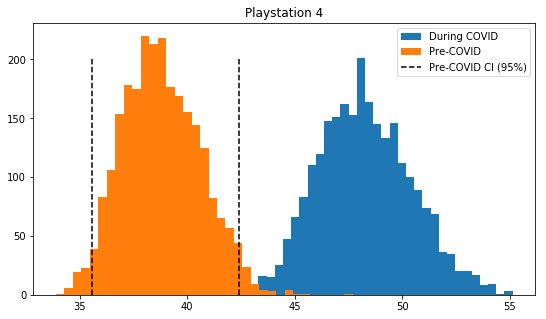

In [44]:
ps4_pre_BS = bootstrap(ps4_pre)
ps4_q_BS = bootstrap(ps4_q)
double_plot(ps4_q_BS, ps4_pre_BS, 'Playstation 4', 'Plot_Images/ps4_plot.png')

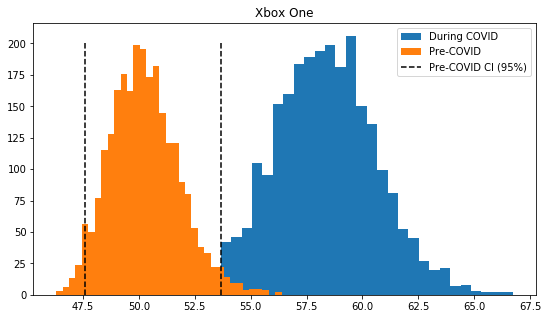

In [45]:
xbox_pre_BS = bootstrap(xbox_pre)
xbox_q_BS = bootstrap(xbox_q)
double_plot(xbox_q_BS, xbox_pre_BS,'Xbox One', 'Plot_Images/xbox_plot.png')

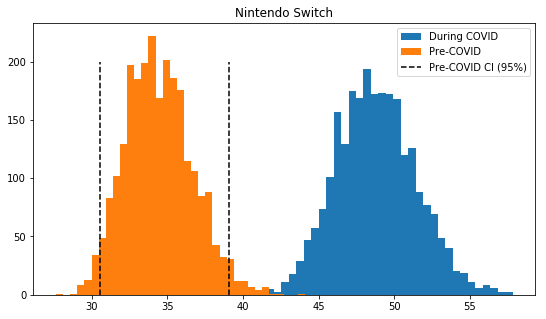

In [46]:
switch_pre_BS = bootstrap(switch_pre)
switch_q_BS = bootstrap(switch_q)
double_plot(switch_q_BS, switch_pre_BS, 'Nintendo Switch', 'Plot_Images/switch_plot.png')

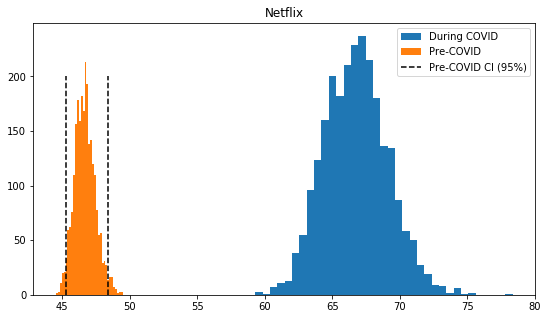

In [47]:
netflix_pre_BS = bootstrap(netflix_pre)
netflix_q_BS = bootstrap(netflix_q)
double_plot(netflix_q_BS, netflix_pre_BS, 'Netflix', 'Plot_Images/netflix_plot.png')

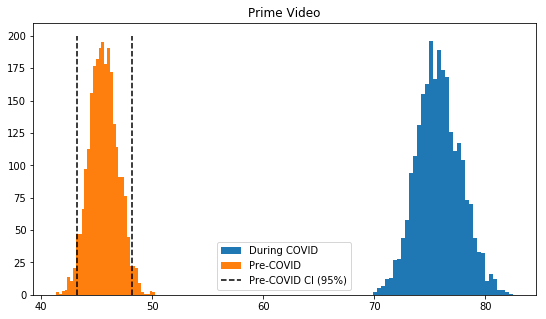

In [48]:
prime_pre_BS = bootstrap(prime_pre)
prime_q_BS = bootstrap(prime_q)
double_plot(prime_q_BS, prime_pre_BS, 'Prime Video', 'Plot_Images/prime_plot.png')

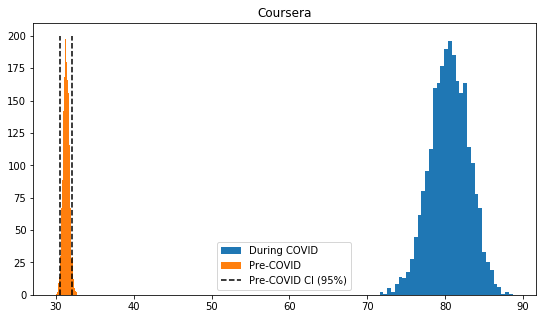

In [49]:
coursera_pre_BS = bootstrap(coursera_pre)
coursera_q_BS = bootstrap(coursera_q)
double_plot(coursera_q_BS, coursera_pre_BS, 'Coursera', 'Plot_Images/coursera_plot.png')

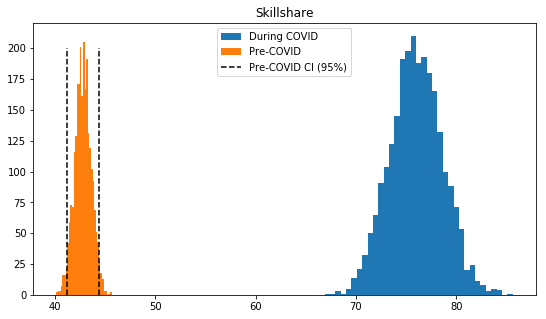

In [50]:
skillshare_pre_BS = bootstrap(skillshare_pre)
skillshare_q_BS = bootstrap(skillshare_q)
double_plot(skillshare_q_BS, skillshare_pre_BS, 'Skillshare', 'Plot_Images/skillshare_plot.png')

**Conclusions** <br>
We can instantly see that the search volume for all topics grew substantially in the COVID period, well above what could be explained by the Null Hypothesis. The average for all the 'social isolation' search metrics lie well beyond the estabilished 95% Confidence interval marked by the dashed lines, meaning they can't be explained by pure luck. <br>
The Nintendo Switch was, indeed, the console with the biggest relative difference between timeframes, as seen by the bigger separation between blue and orange histograms. <br>
All the streaming services, both educational and leisure oriented saw immense increase when comparing histograms, relatively much more than any console. This may be because of the lower cost related to them as opposed to highly priced videogame consoles, which greatly increases their accessibility. <br>
To answer the final part of the hypotheses, we need to measure how much the search volume for each topic changes over time. To have a general idea, we can simply fit the original datasets' entries into linear functions and analyze their slopes.

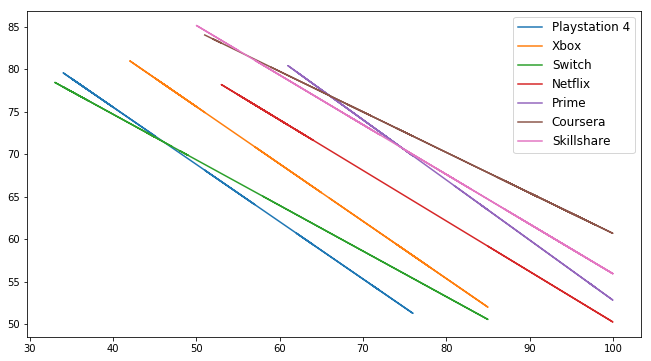

In [51]:
def tendency_plot(vector, name):
    x_vector = vector['Worldwide number of searches']
    y_vector = vector.index
    m_vector, b_vector = np.polyfit(x_vector , y_vector , 1)
    plt.plot(x_vector, m_vector * x_vector + b_vector, label=name)

tendency_plot(ps4_q,'Playstation 4')
tendency_plot(xbox_q, 'Xbox')
tendency_plot(switch_q, 'Switch')
tendency_plot(netflix_q, 'Netflix')
tendency_plot(prime_q, 'Prime')
tendency_plot(coursera_q, 'Coursera')
tendency_plot(skillshare_q, 'Skillshare')
fig = plt.gcf()
fig.set_size_inches(11, 6)
plt.legend(fontsize='large')
plt.savefig('Plot_Images/general_tendency_plot.png')
plt.show()

Contrary to our initial hypotheses, all search topics tend to decrease over time at roughly the same rate. No vastly different outliers can be seen in the plotted data. This also shows us these trends are most likely temporary, decreasing towards their original expected values as the COVID situation shifts with time